Import the Dataset using pandas library

In [1]:
path = r"\Country-data.csv"

In [2]:
import pandas as pd
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Analyze about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Exploratory data analysis

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Outlier Detection

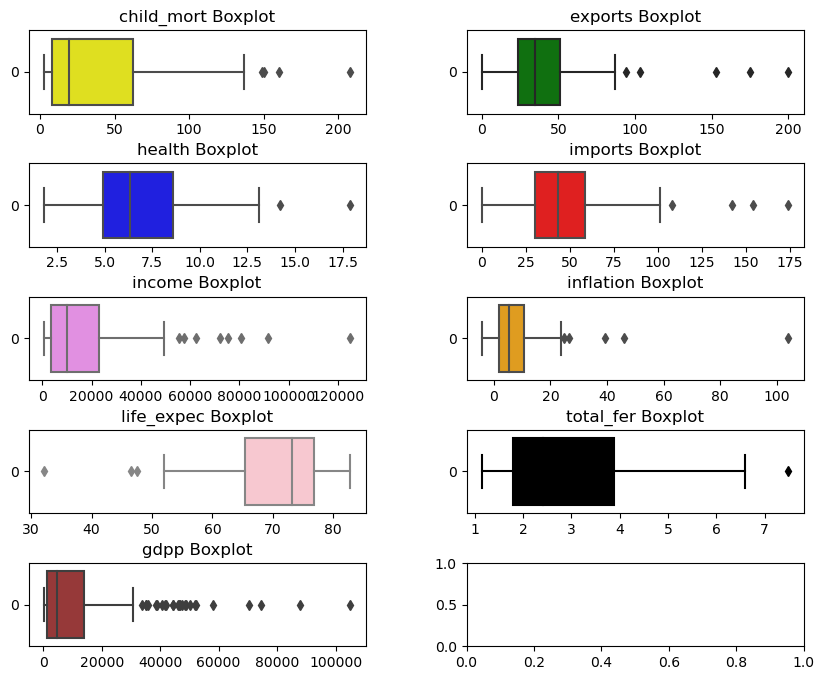

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
global k, r
k = 0
r = 0
fix, axs = plt.subplots(5, 2,figsize = (10, 8))
for cl, i in zip(["yellow", "Green","Blue","red", "violet","orange", "pink","black", "brown"],range(1,len(df.columns))):
    if i%2 == 0:
        j = 1
    else:
        j = 0
    r += 1
    
    sns.boxplot(data = df.iloc[:,i],color=cl,orient="horizontal", ax = axs[k,j], whis = 1.5)
    axs[k, j].set_title(df.columns[i] + " Boxplot")
    plt.subplots_adjust(wspace = 0.3, hspace= 0.6)
    if r==2:
        
        k += 1
        r= 0

In [6]:
import numpy as np
Q1 = []
Q3 = []
for i in range(1, len(df.columns)):
    Q1.append(np.percentile(df.iloc[:,i].sort_values(ascending = True), 25))
    Q3.append(np.percentile(df.iloc[:,i].sort_values(ascending = True), 75))
lw = []
uw = []
for j, k in zip(range(len(Q1)), range(len(Q3))):
    lw.append(Q1[j]-1.5*(Q3[k]-Q1[j]))
    uw.append(Q3[k]+1.5*(Q3[k]-Q1[j]))
for col in range(1, len(df.columns)):
    print(df.columns[col], df[df.iloc[:,col]<lw[col-1]][df.columns[col]].count(), df[df.iloc[:,col]>uw[col-1]][df.columns[col]].count())

child_mort 0 4
exports 0 5
health 0 2
imports 0 4
income 0 8
inflation 0 5
life_expec 3 0
total_fer 0 1
gdpp 0 25


Correlation Identification

In [7]:
corr_matrix = df.corr()
corr_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

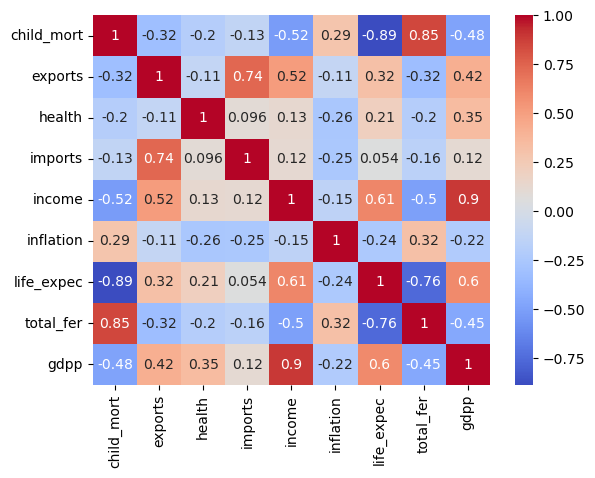

In [8]:
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

In [9]:
correlations = []
for j in range(len(corr_matrix.columns)):
    for i in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.7 and i > j:
            correlations.append((corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i,j]))
correlations

[('life_expec', 'child_mort', -0.8866760973367771),
 ('total_fer', 'child_mort', 0.8484781105566707),
 ('imports', 'exports', 0.7373808339554994),
 ('gdpp', 'income', 0.895571433087531),
 ('total_fer', 'life_expec', -0.7608746874349646)]

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
X = df.drop("country", axis = 1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [12]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [16]:
pca_x = pca.fit_transform(X_scaled)
pca_x

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [17]:
pca_c = pca.explained_variance_ratio_
pca_c

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [18]:
pca_c_cum = pca.explained_variance_ratio_.cumsum()
pca_c_cum

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [19]:
pca_c_cum * 100

array([ 45.95173979,  63.13336544,  76.13762433,  87.19078614,
        94.53099756,  97.01523224,  98.27566264,  99.25694438,
       100.        ])

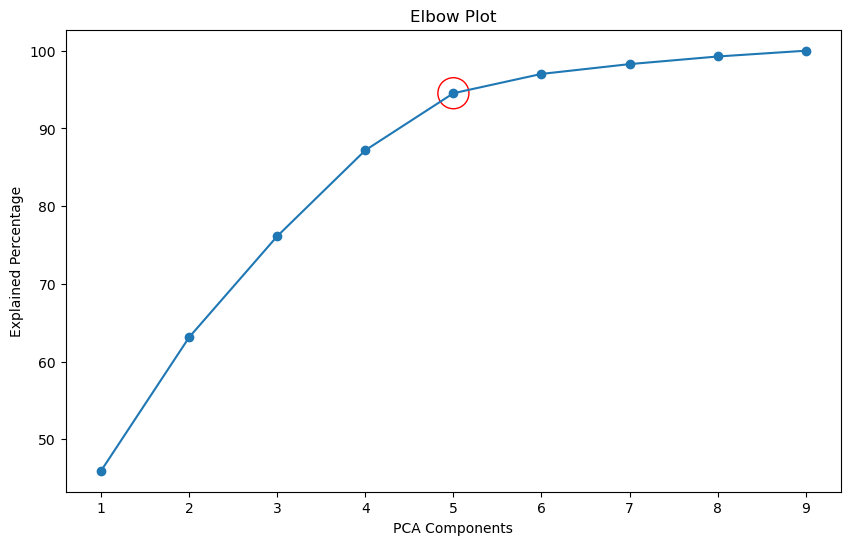

In [20]:
import matplotlib.patches as patches
h_x = 5
h_y = pca_c_cum[4]*100
circle_r = 500
plt.figure(figsize = (10,6))
plt.plot(range(1,len(pca_c_cum)+1), pca_c_cum*100, linestyle = "-", marker = "o")
# Circle = patches.Circle((h_x, h_y), circle_r, color = "red", fill = False)
# plt.add_patch(Circle)
plt.scatter(h_x, h_y, circle_r, facecolors='none', edgecolors = "red")
plt.title("Elbow Plot")
plt.xlabel("PCA Components")
plt.ylabel("Explained Percentage")
plt.show()

From 6th Components Explained Ratio almost following a Straight line So 5 components explains Data well.

In [21]:
n_comp = 5

In [22]:
pca_comp = pca.components_
df_comp = pd. DataFrame(pca_comp.T, columns = ["PC " + str(i) for i in range(1, len(X.columns)+1)], index = X.columns)
df_comp

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542
exports,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082
health,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037
income,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646


In [23]:
Tot = df_comp.iloc[:,:n_comp].abs().sum(axis = 1)
Tot

child_mort    1.181570
exports       1.102528
health        1.970455
imports       1.460514
income        1.361833
inflation     1.709408
life_expec    1.074482
total_fer     1.092077
gdpp          1.273806
dtype: float64

In [24]:
df_compo = df_comp.drop(["PC 6", "PC 7", "PC 8", "PC 9"], axis = 1)
df_compo

,PC 1,PC 2,PC 3,PC 4,PC 5
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
exports,0.283897,0.613163,0.144761,0.003091,0.057616
health,0.150838,-0.243087,-0.596632,0.461897,0.518000
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
income,0.398441,0.022536,0.301548,0.392159,-0.247150
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


In [25]:
df_compo = df_compo.assign(Total = Tot)
df_compo

,PC 1,PC 2,PC 3,PC 4,PC 5,Total
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,1.181570
exports,0.283897,0.613163,0.144761,0.003091,0.057616,1.102528
health,0.150838,-0.243087,-0.596632,0.461897,0.518000,1.970455
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,1.460514
income,0.398441,0.022536,0.301548,0.392159,-0.247150,1.361833
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,1.709408
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,1.074482
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,1.092077
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,1.273806


In [26]:
df_compo.sort_values(by = "Total", ascending = False)

,PC 1,PC 2,PC 3,PC 4,PC 5,Total
health,0.150838,-0.243087,-0.596632,0.461897,0.518000,1.970455
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,1.709408
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,1.460514
income,0.398441,0.022536,0.301548,0.392159,-0.247150,1.361833
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,1.273806
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,1.181570
exports,0.283897,0.613163,0.144761,0.003091,0.057616,1.102528
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,1.092077
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,1.074482


Since Sum of loadings are too low and highly correlated with other variables so we can remove variables and life_expec, total_fer. gdpp and income are also highly correlated and portray almost same information so in this case we can remove one of this variable.

In [27]:
less_imp = ["life_expec", "total_fer", "gdpp", "exports"]
X_df = pd.DataFrame(X_scaled, columns = X.columns)
X_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [28]:
X_df.shape

(167, 9)

In [29]:
X_df.drop(less_imp, axis = 1, inplace = True)
X_df.head()

,child_mort,health,imports,income,inflation
0,1.291532,0.279088,-0.082455,-0.808245,0.157336
1,-0.538949,-0.097016,0.070837,-0.375369,-0.312347
2,-0.272833,-0.966073,-0.641762,-0.220844,0.789274
3,2.007808,-1.448071,-0.165315,-0.585043,1.387054
4,-0.695634,-0.286894,0.497568,0.101732,-0.601749


In [30]:
from sklearn.cluster import KMeans

In [31]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
wcss = []
max_c = 10
for i in range(1, max_c+1):
    kmeans = KMeans(n_clusters = i, random_state = 17)
    kmeans.fit(X_df)
    wcss.append(kmeans.inertia_)

C:\Users\Najwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wcss

[834.9999999999999,
 635.3983111878774,
 542.9696060337786,
 473.17003515488824,
 403.91123198794827,
 334.56376254816746,
 285.5105157579758,
 251.33714643713532,
 233.98393025718678,
 213.12964304135897]

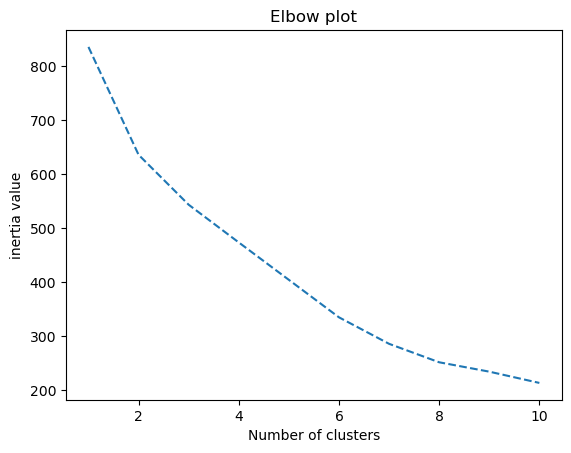

In [33]:
plt.plot(range(1,max_c+1), wcss, linestyle = "dashed")
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("inertia value")
plt.show()

In [34]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silh_score = []
for i in range(2, max_c+1):
    km = KMeans(n_clusters = i, random_state = 17)
    cluster_lab = km.fit_predict(X_df)
    silh_avg = silhouette_score(X_df, cluster_lab)
    silh_score.append(silh_avg)

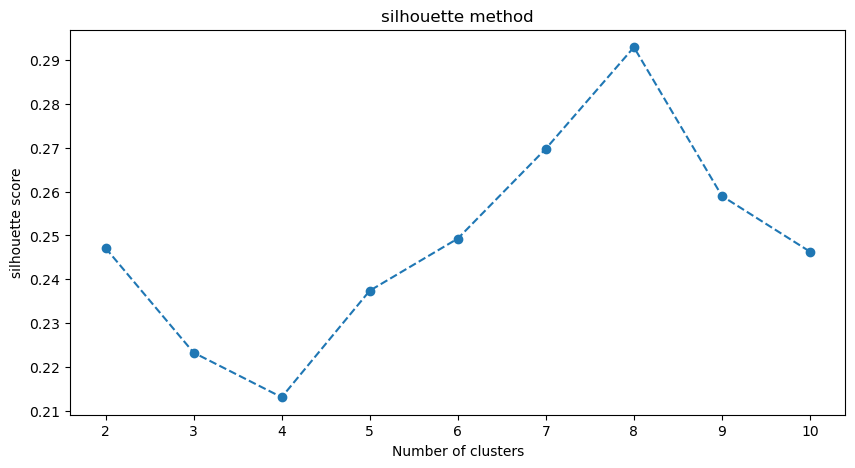

In [35]:
plt.figure(figsize = (10,5))
plt.plot(range(2,max_c+1), silh_score, linestyle = "dashed", marker = 'o',)
plt.title("silhouette method")
plt.xlabel("Number of clusters")
plt.ylabel("silhouette score")
plt.show()

In [36]:
kmeans_f = KMeans(n_clusters = 8, random_state = 17)
kmeans_f.fit(X_df)
cluster_l = kmeans_f.labels_
cluster_c = kmeans_f.cluster_centers_
cluster_s = pd.Series(cluster_l).value_counts()

<AxesSubplot:>

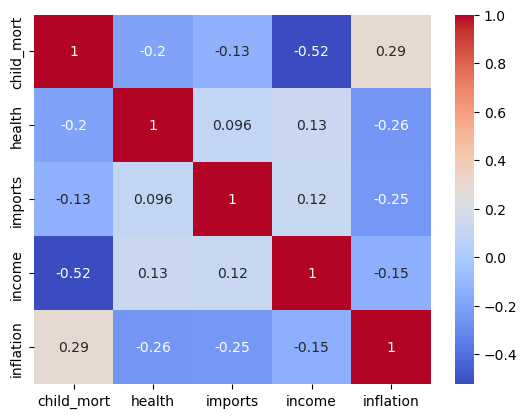

In [37]:
X_corr = X_df.corr()
sns.heatmap(X_corr,cmap="coolwarm",annot=True)

In [38]:
X_df

,child_mort,health,imports,income,inflation
0,1.291532,0.279088,-0.082455,-0.808245,0.157336
1,-0.538949,-0.097016,0.070837,-0.375369,-0.312347
2,-0.272833,-0.966073,-0.641762,-0.220844,0.789274
3,2.007808,-1.448071,-0.165315,-0.585043,1.387054
4,-0.695634,-0.286894,0.497568,0.101732,-0.601749
...,...,...,...,...,...
162,-0.225578,-0.571711,0.240700,-0.738527,-0.489784
163,-0.526514,-0.695862,-1.213499,-0.033542,3.616865
164,-0.372315,0.008877,1.380030,-0.658404,0.409732
165,0.448417,-0.597272,-0.517472,-0.658924,1.500916


In [39]:
X_df["cluster"] = cluster_l
X_df.head()

,child_mort,health,imports,income,inflation,cluster
0,1.291532,0.279088,-0.082455,-0.808245,0.157336,0
1,-0.538949,-0.097016,0.070837,-0.375369,-0.312347,5
2,-0.272833,-0.966073,-0.641762,-0.220844,0.789274,3
3,2.007808,-1.448071,-0.165315,-0.585043,1.387054,0
4,-0.695634,-0.286894,0.497568,0.101732,-0.601749,5


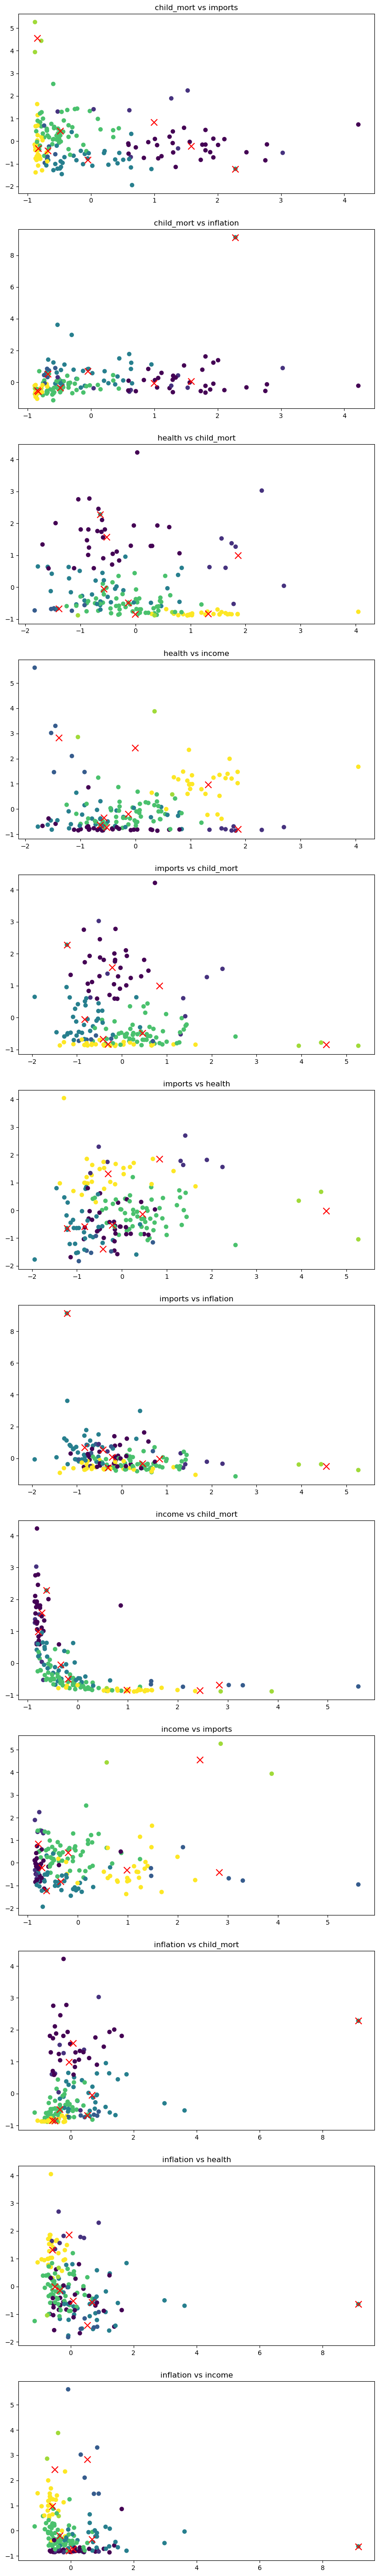

In [40]:
li = []
for i in range(0,5):
    for j in range(0,5):
        if i != j:
            li.append([i, j])
for i in li:
    for j in li:
        if i[0] == j[1] and i[1] == j[0]:
            li.remove(i)
fix, axs = plt.subplots(12, 1,figsize = (10, 72))
for i,el in zip(range(0,len(li)),li):
    
    axs[i].scatter(X_df.iloc[:,el[0]], X_df.iloc[:,el[1]], c = cluster_l, cmap = 'viridis')
    axs[i].scatter(cluster_c[:,el[0]], cluster_c[:,el[1]], marker = 'x', c= 'red', s= 100, label= 'centroids')
    axs[i].set_title(f"{X_df.columns[el[0]]} vs {X_df.columns[el[1]]}")
    # axs[i].colorbar(label = 'Cluster')
    # axs[].legend()
plt.show()

In [41]:
XX_df = X_df.insert(0, "country", df["country"])
XX_df

In [42]:
X_df

,country,child_mort,health,imports,income,inflation,cluster
0,Afghanistan,1.291532,0.279088,-0.082455,-0.808245,0.157336,0
1,Albania,-0.538949,-0.097016,0.070837,-0.375369,-0.312347,5
2,Algeria,-0.272833,-0.966073,-0.641762,-0.220844,0.789274,3
3,Angola,2.007808,-1.448071,-0.165315,-0.585043,1.387054,0
4,Antigua and Barbuda,-0.695634,-0.286894,0.497568,0.101732,-0.601749,5
...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,-0.571711,0.240700,-0.738527,-0.489784,5
163,Venezuela,-0.526514,-0.695862,-1.213499,-0.033542,3.616865,3
164,Vietnam,-0.372315,0.008877,1.380030,-0.658404,0.409732,5
165,Yemen,0.448417,-0.597272,-0.517472,-0.658924,1.500916,3


In [43]:
df["cluster"] = cluster_l
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5


In [44]:
df["cluster"].value_counts().sort_values(ascending = False)

5    57
3    33
0    31
7    28
1     8
2     6
6     3
4     1
Name: cluster, dtype: int64

In [45]:
my_dict = {}
for i in range(8):
    my_dict[str(i)] = df[df["cluster"] == i].drop("country", axis = 1).mean(axis = 0)
pd.DataFrame(my_dict)

,0,1,2,3,4,5,6,7
child_mort,101.767742,78.26250,11.050000,36.257576,130.00,18.731579,4.133333,4.903571
exports,30.732258,21.52750,64.900000,29.172091,25.30,47.573684,176.000000,40.114286
health,5.374839,11.91250,3.000000,5.239697,5.07,6.455614,6.793333,10.427500
imports,41.590323,67.08750,36.666667,26.911088,17.40,58.017544,156.666667,39.364286
income,3347.387097,1924.25000,71516.666667,10517.272727,5150.00,13390.526316,64033.333333,35975.714286
inflation,8.579194,7.26875,13.363333,14.987273,104.00,4.224930,2.468000,1.731286
life_expec,58.606452,60.05000,77.083333,70.133333,60.50,72.905263,81.433333,80.296429
total_fer,5.199677,4.10750,2.308333,2.921515,5.84,2.247193,1.380000,1.783214
gdpp,1503.225806,1083.75000,36283.333333,5035.454545,2330.00,7942.526316,57566.666667,39218.571429
cluster,0.000000,1.00000,2.000000,3.000000,4.00,5.000000,6.000000,7.000000


In [46]:
my_vict = {}
for i in range(8):
    my_vict[i] = df[df["cluster"] == i]["country"].values
my_vict

{0: array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
        'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
        "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Ghana', 'Guinea',
        'Guinea-Bissau', 'Haiti', 'Kenya', 'Lao', 'Madagascar', 'Malawi',
        'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Pakistan', 'Senegal',
        'Tanzania', 'Togo', 'Turkmenistan', 'Uganda', 'Zambia'],
       dtype=object),
 1: array(['Burundi', 'Kiribati', 'Lesotho', 'Liberia',
        'Micronesia, Fed. Sts.', 'Moldova', 'Rwanda', 'Sierra Leone'],
       dtype=object),
 2: array(['Brunei', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
        'United Arab Emirates'], dtype=object),
 3: array(['Algeria', 'Argentina', 'Azerbaijan', 'Bangladesh', 'Bolivia',
        'Brazil', 'China', 'Colombia', 'Congo, Rep.', 'Dominican Republic',
        'Egypt', 'Eritrea', 'Gabon', 'India', 'Indonesia', 'Iran', 'Iraq',
        'Kazakhstan', 'Libya', 'Mongolia', 'Myanmar', 

In This Cluster Analysis I have grouped the countries which has almost the same characteristics. According to that 6, 7, 2, 3, 5, 1, 0, 4

In [47]:
cluster_rank = [6, 7, 2, 3, 5, 1, 0, 4]
level = ["Best", "Better","Well", "Good","Above Normal", "Normal", "Weak","Worst"]
for i in range(1,len(cluster_rank)+1):
    print(f"{level[-i]}\n")
    for j in range(len(my_vict[cluster_rank[-i]])):
        print(my_vict[cluster_rank[-i]][j])
    print("\n")

Worst

Nigeria


Weak

Afghanistan
Angola
Benin
Burkina Faso
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Cote d'Ivoire
Equatorial Guinea
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Kenya
Lao
Madagascar
Malawi
Mali
Mauritania
Mozambique
Niger
Pakistan
Senegal
Tanzania
Togo
Turkmenistan
Uganda
Zambia


Normal

Burundi
Kiribati
Lesotho
Liberia
Micronesia, Fed. Sts.
Moldova
Rwanda
Sierra Leone


Above Normal

Albania
Antigua and Barbuda
Armenia
Bahamas
Bahrain
Barbados
Belarus
Belize
Bhutan
Botswana
Bulgaria
Cambodia
Cape Verde
Chile
Croatia
Cyprus
Czech Republic
Ecuador
El Salvador
Estonia
Fiji
Georgia
Grenada
Guatemala
Guyana
Hungary
Jamaica
Jordan
Kyrgyz Republic
Latvia
Lebanon
Lithuania
Macedonia, FYR
Malaysia
Maldives
Mauritius
Montenegro
Morocco
Namibia
Panama
Paraguay
Poland
Romania
Samoa
Seychelles
Slovak Republic
Solomon Islands
South Korea
St. Vincent and the Grenadines
Suriname
Tajikistan
Thailand
Tonga
Tunisia
Ukraine
Vanuatu
Vietnam


Good

Algeria
Argentina
Az

So Most in need countries by powerty are the countries falls under worst and weak